In [2]:
### Ethics & Proxy Disclaimer

'''Lifecycle pressure is modeled using **population-level enrolment intensity proxies**.
No individual age, identity, or Aadhaar record is accessed or inferred.

    ## Visualizations — Single Region Pilot (Puducherry)

The following visuals are adapted for a **single-region pilot**.
They emphasize:
- Temporal risk evolution
- Threshold-based decision triggers
- Preventive value of early intervention

These visuals are directly extensible to multi-region settings.'''


'Lifecycle pressure is modeled using **population-level enrolment intensity proxies**.\nNo individual age, identity, or Aadhaar record is accessed or inferred.\n\n    ## Visualizations — Single Region Pilot (Puducherry)\n\nThe following visuals are adapted for a **single-region pilot**.\nThey emphasize:\n- Temporal risk evolution\n- Threshold-based decision triggers\n- Preventive value of early intervention\n\nThese visuals are directly extensible to multi-region settings.'

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

PROJECT_ROOT = Path("..").resolve()

df = pd.read_csv(PROJECT_ROOT / "data/processed/aadhaar_monthly_merged.csv")
sri_df = pd.read_csv(PROJECT_ROOT / "data/processed/sri_output.csv")
cbr_df = pd.read_csv(PROJECT_ROOT / "data/processed/cbr_output.csv")
ipr_df = pd.read_csv(PROJECT_ROOT / "data/processed/ipr_output.csv")

df["total_demand"] = df["enrolments"] + df["biometric_updates"]


In [10]:
plt.figure(figsize=(7,5))
plt.scatter(df["total_demand"], sri_df["sri_score"], c=sri_df["sri_score"], cmap="Reds")
plt.xlabel("Total Aadhaar Service Demand")
plt.ylabel("Service Resilience Index (SRI)")
plt.title("Is Service Resilience Sensitive to Demand Growth?")
plt.colorbar(label="SRI")
plt.tight_layout()
plt.savefig(PROJECT_ROOT / "output/sri_vs_demand.png")
plt.close()


In [12]:
plt.figure(figsize=(8,5))
plt.plot(cbr_df["month"], cbr_df["cbr_score"], marker="o")
plt.xticks(rotation=45)
plt.ylabel("Continuity Break Risk (CBR)")
plt.title("Trajectory of Aadhaar Continuity Risk Over Time")
plt.tight_layout()
plt.savefig(PROJECT_ROOT / "output/cbr_trajectory.png")
plt.close()


In [17]:
# Align SRI and CBR at monthly level (decision-grade)
sri_monthly = (
    sri_df
    .groupby(["region_id", "month"], as_index=False)
    .agg({"sri_score": "mean"})
)

cbr_monthly = (
    cbr_df
    .groupby(["region_id", "month"], as_index=False)
    .agg({"cbr_score": "mean"})
)

decision_df = (
    sri_monthly
    .merge(
        cbr_monthly,
        on=["region_id", "month"],
        how="inner",
        validate="one_to_one"
    )
    .merge(
        ipr_df[["region_id", "month", "priority_score"]],
        on=["region_id", "month"],
        how="inner",
        validate="one_to_one"
    )
)

print(len(decision_df))


6


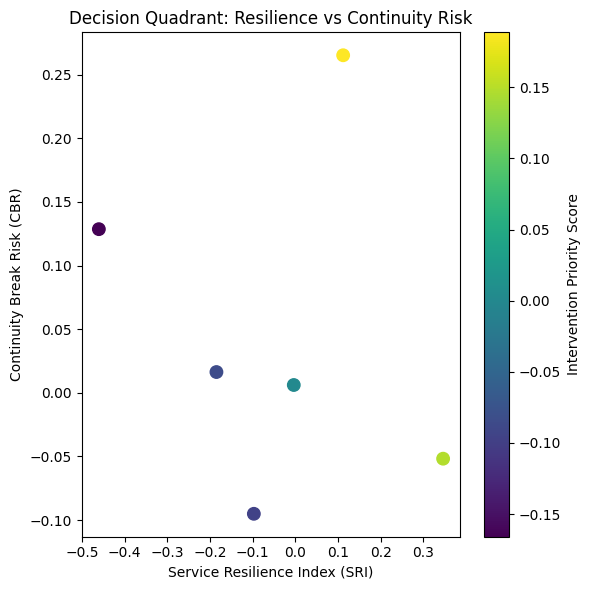

In [21]:
plt.figure(figsize=(6, 6))
plt.scatter(
    decision_df["sri_score"],
    decision_df["cbr_score"],
    c=decision_df["priority_score"],
    cmap="viridis",
    s=80
)

plt.xlabel("Service Resilience Index (SRI)")
plt.ylabel("Continuity Break Risk (CBR)")
plt.title("Decision Quadrant: Resilience vs Continuity Risk")
plt.colorbar(label="Intervention Priority Score")
plt.tight_layout()
plt.savefig(PROJECT_ROOT / "output/Decision_Quadrant.png")
plt.show()
plt.close()



In [14]:
top_ipr = ipr_df.sort_values("priority_score", ascending=False)

plt.figure(figsize=(8,5))
plt.bar(top_ipr["month"], top_ipr["priority_score"])
plt.xticks(rotation=45)
plt.ylabel("Intervention Priority Score")
plt.title("Which Months Require Immediate UIDAI Action?")
plt.tight_layout()
plt.savefig(PROJECT_ROOT / "output/ipr_ranking.png")
plt.close()


In [15]:
plt.figure(figsize=(6,4))
ipr_df["recommended_action"].value_counts().plot(kind="bar")
plt.ylabel("Count of Periods")
plt.title("Distribution of Recommended Actions")
plt.tight_layout()
plt.savefig(PROJECT_ROOT / "output/action_distribution.png")
plt.close()


In [16]:
plt.figure(figsize=(7,5))
plt.plot(cbr_df["month"], cbr_df["cbr_score"], label="Baseline Risk")
plt.plot(cbr_df["month"], cbr_df["cbr_score"] * 0.85, linestyle="--", label="Post-Intervention (Simulated)")
plt.xticks(rotation=45)
plt.ylabel("Continuity Risk")
plt.title("Projected Impact of Preventive Intervention")
plt.legend()
plt.tight_layout()
plt.savefig(PROJECT_ROOT / "output/intervention_impact.png")
plt.close()